<a href="https://www.kaggle.com/code/nitinsoni1/customer-churn-and-prevention-in-travel-industry?scriptVersionId=95272190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libaries

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the Data

In [2]:
churn  = pd.read_csv('../input/travel-dataset/Customertravel.csv')

* Check the head of customers, and check out its info() and describe() methods.

In [3]:
churn.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
churn.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# Transformaion

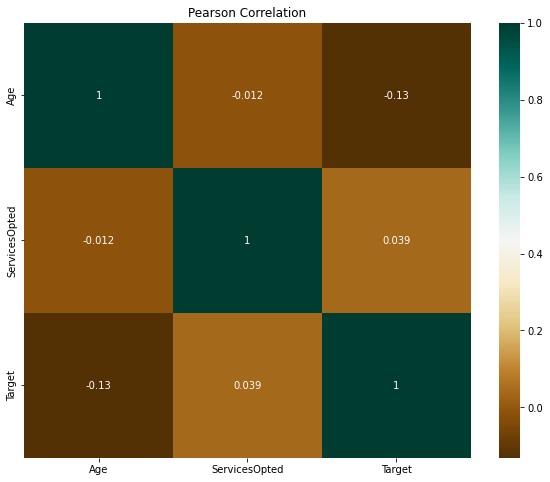

In [6]:
#heatmap correlation
plt.figure(figsize = (10,8))
sns.heatmap(churn.corr(), annot = True, cmap = 'BrBG')
plt.title("Pearson Correlation")
plt.show()

In [7]:
#transform categorical variable
churn['FrequentFlyer'] = churn['FrequentFlyer'].astype('category')
churn['AnnualIncomeClass'] = churn['AnnualIncomeClass'].astype('category')
churn['AccountSyncedToSocialMedia'] = churn['AccountSyncedToSocialMedia'].astype('category')
churn['BookedHotelOrNot'] = churn['BookedHotelOrNot'].astype('category')
print(churn.dtypes)

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object


In [8]:
#handling categorical data
df = pd.DataFrame(churn)
df['FrequentFlyer'] = df['FrequentFlyer'].cat.codes
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].cat.codes
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].cat.codes
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].cat.codes
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


# Split Dataset 
* Importing sckit-learn

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math


In [10]:
X = df.drop('Target', axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(667, 6)
(667,)
(287, 6)
(287,)


# Classification of Model

In [11]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True),
    LinearSVC(),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [12]:
#report models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 86.4111%
Log Loss: 4.693447650795778


SVC
****Results****
Accuracy: 81.8815%
Log Loss: 6.25794691738362


LinearSVC
****Results****
Accuracy: 52.2648%
Log Loss: 16.4875244326077


DecisionTreeClassifier
****Results****
Accuracy: 84.6690%
Log Loss: 5.295182424181508




/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier
****Results****
Accuracy: 86.7596%
Log Loss: 4.573120198494979


XGBClassifier
****Results****
Accuracy: 88.5017%
Log Loss: 3.971399355378068


AdaBoostClassifier
****Results****
Accuracy: 85.0174%
Log Loss: 5.174849399773181


GradientBoostingClassifier
****Results****
Accuracy: 88.1533%
Log Loss: 4.091749096108979


GaussianNB
****Results****
Accuracy: 79.0941%
Log Loss: 7.220744843230897


LinearDiscriminantAnalysis
****Results****
Accuracy: 83.2753%
Log Loss: 5.776570242890092


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 81.1847%
Log Loss: 6.498665901221785




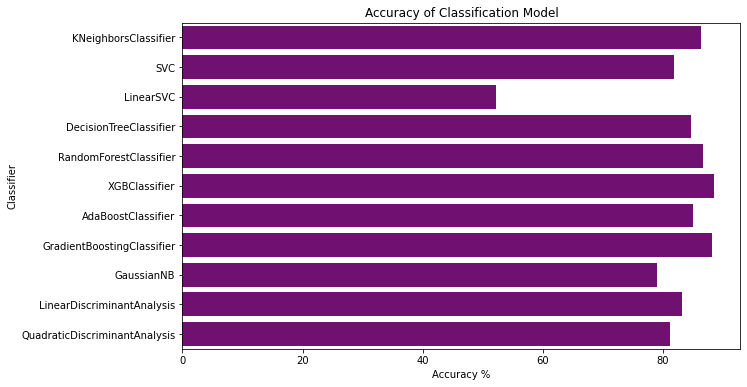

In [13]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "purple")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes("muted")
plt.show()

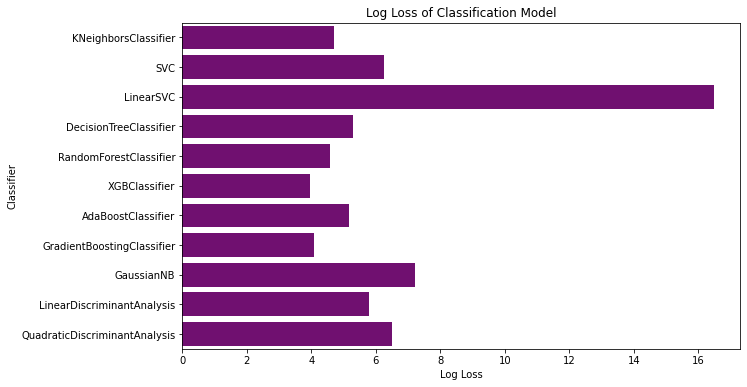

In [14]:
#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "purple")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

* Extreme Gradient Boosting Model is the best score result

In [15]:
#build model
xgb = XGBClassifier()
%time xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

CPU times: user 114 ms, sys: 7.79 ms, total: 122 ms
Wall time: 63.2 ms


0.8850174216027874

In [16]:
#prediction
y_pred = xgb.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1]


In [17]:
#report of MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE: '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: '+ str(rmse))

MSE: 0.11498257839721254
RMSE: 0.33909081143141073


[[209  15]
 [ 18  45]]


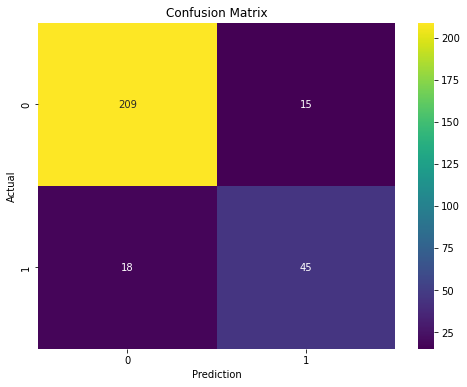

In [18]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [19]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       224
           1       0.75      0.71      0.73        63

    accuracy                           0.89       287
   macro avg       0.84      0.82      0.83       287
weighted avg       0.88      0.89      0.88       287



# Visualization 

In [20]:
#transform Frequent Flyer
df.FrequentFlyer[df['FrequentFlyer'] == 0] = 'No'
df.FrequentFlyer[df['FrequentFlyer'] == 1] = 'Yes'
df.FrequentFlyer[df['FrequentFlyer'] == 2] = 'No Record'

#transform Annual Income Class
df.AnnualIncomeClass[df['AnnualIncomeClass'] == 0] = 'Low Income'
df.AnnualIncomeClass[df['AnnualIncomeClass'] == 1] = 'Middle Income'
df.AnnualIncomeClass[df['AnnualIncomeClass'] == 2] = 'High Income'

#transform Account Synced To Social Media
df.AccountSyncedToSocialMedia[df['AccountSyncedToSocialMedia'] == 0] = 'No'
df.AccountSyncedToSocialMedia[df['AccountSyncedToSocialMedia'] == 1] = 'Yes'

#transform Booked Hotel Or Not
df.BookedHotelOrNot[df['BookedHotelOrNot'] == 0] = 'No'
df.BookedHotelOrNot[df['BookedHotelOrNot'] == 1] = 'Yes'

#transform target
df.Target[df['Target'] == 0] = 'Customer Does Not Churn'
df.Target[df['Target'] == 1] = 'Customer Churn'
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,High Income,6,No,Yes,Customer Does Not Churn
1,34,No Record,Middle Income,5,Yes,No,Customer Churn
2,37,No,High Income,3,Yes,No,Customer Does Not Churn
3,30,No,High Income,2,No,No,Customer Does Not Churn
4,30,No,Middle Income,1,No,No,Customer Does Not Churn


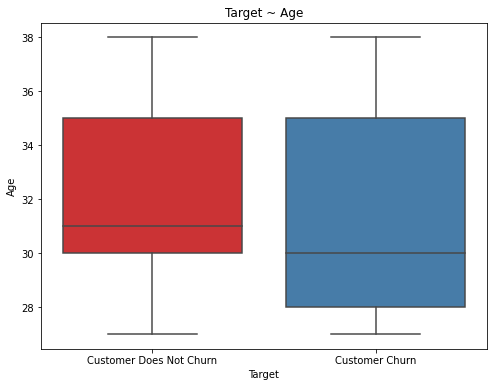

In [21]:
#visualize target ~ age
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Target', y = 'Age', palette = 'Set1')
plt.title("Target ~ Age")
plt.show()

In [22]:
#group frequent flyer & target
flyer_target = df.groupby(['Target', 'FrequentFlyer']).size().reset_index(name = 'Count')
print(flyer_target)

                    Target FrequentFlyer  Count
0           Customer Churn            No     69
1           Customer Churn     No Record    147
2           Customer Churn           Yes      8
3  Customer Does Not Churn            No    539
4  Customer Does Not Churn     No Record    139
5  Customer Does Not Churn           Yes     52


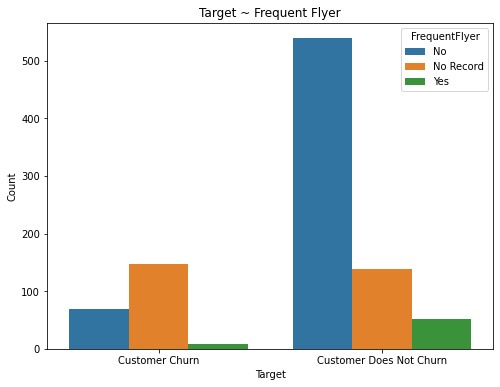

In [23]:
#visualize frequent flyer ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'FrequentFlyer', data = flyer_target)
plt.title("Target ~ Frequent Flyer")
plt.show()

In [24]:
#group annual income class & target
income_target = df.groupby(['Target', 'AnnualIncomeClass']).size().reset_index(name = 'Count')
print(income_target)

                    Target AnnualIncomeClass  Count
0           Customer Churn       High Income     28
1           Customer Churn        Low Income     92
2           Customer Churn     Middle Income    104
3  Customer Does Not Churn       High Income    381
4  Customer Does Not Churn        Low Income     67
5  Customer Does Not Churn     Middle Income    282


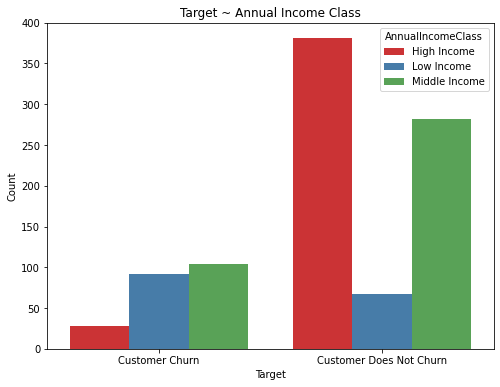

In [25]:
#visualize annual income class ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AnnualIncomeClass', data = income_target, palette = 'Set1')
plt.title("Target ~ Annual Income Class")
plt.show()

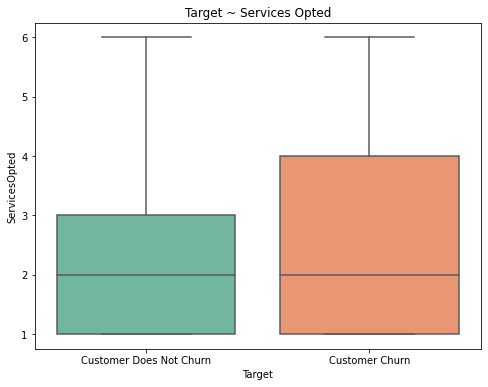

In [26]:
#visualize target ~ services opted
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Target', y = 'ServicesOpted', palette = 'Set2')
plt.title("Target ~ Services Opted")
plt.show()

In [27]:
#group account synced to social media ~ target
acc_target = df.groupby(['Target', 'AccountSyncedToSocialMedia']).size().reset_index(name = 'Count')
print(acc_target)

                    Target AccountSyncedToSocialMedia  Count
0           Customer Churn                         No    125
1           Customer Churn                        Yes     99
2  Customer Does Not Churn                         No    469
3  Customer Does Not Churn                        Yes    261


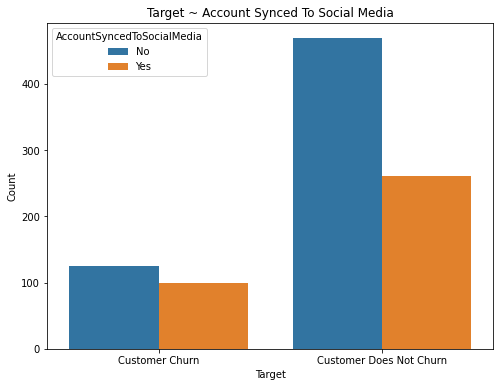

In [28]:
#visualize account synced to social media ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AccountSyncedToSocialMedia', data = acc_target)
plt.title("Target ~ Account Synced To Social Media")
plt.show()

In [29]:
#group booked hotel or not & target
book_target = df.groupby(['Target', 'BookedHotelOrNot']).size().reset_index(name = 'Count')
print(book_target)

                    Target BookedHotelOrNot  Count
0           Customer Churn               No    176
1           Customer Churn              Yes     48
2  Customer Does Not Churn               No    400
3  Customer Does Not Churn              Yes    330


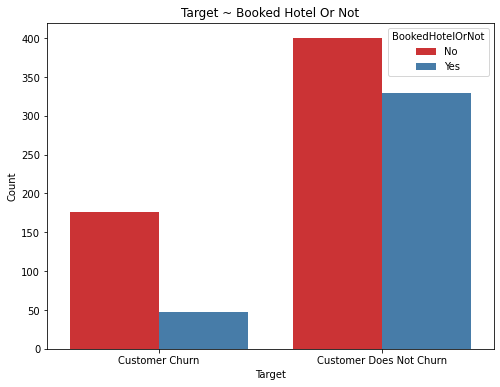

In [30]:
#visualize booked hotel or not ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'BookedHotelOrNot', data = book_target, palette = 'Set1')
plt.title("Target ~ Booked Hotel Or Not")
plt.show()

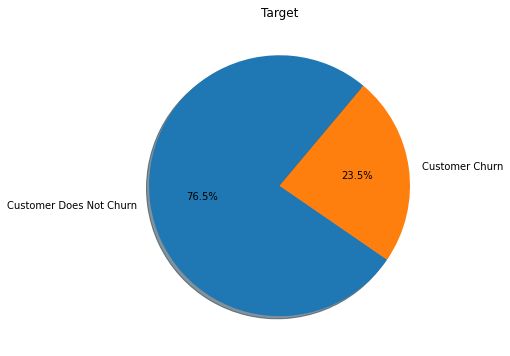

In [31]:
#visualize Target
plt.figure(figsize = (8,6))
x = [np.count_nonzero(df['Target'] == 'Customer Does Not Churn'),
    np.count_nonzero(df['Target'] == 'Customer Churn')]
activities = ['Customer Does Not Churn', 'Customer Churn']
plt.pie(x, labels = activities, startangle = 50, autopct = '%.1f%%', shadow = True)
plt.title("Target")
plt.show()

<AxesSubplot:>

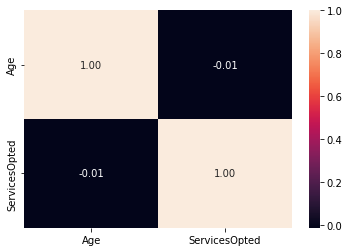

In [32]:
sns.heatmap(df.corr(),annot=True, fmt='1.2f')

# Findings

I find how I can prevent churn to grow revenue and profit. This time, I found some insight about impact on churn.
* Age 27 to 28 and churn are in positive correlation, it means that younger age people tend to churn.
* Frequent Flight and churn are in positive correlation. It may mean that people who travel often also book for the time being, and have cancel it. I have to take care of people who often travel not to cancel.
* Middle income people and churn are in negative correlation, low income people and churn are in both positive and negative, and high income people and churn are in positive correlation.
* People whose number of times services opted during recent years is 'one' and churn are in negative correlation. On the other hand, 'two' ,'five' and 'six'and churn are in positive correlation.
* Account syncing to social media and churn are both in positive and negative. It means that both side are using social media.
* People who booked the hotel and churn are in negative correlation. It means that booking the hotel may be deterrence for churn.
**As a result, to prevent churn, especially, I have to take care of people who are 27 to 28 years old, or/and who have frequent flight or/and two, five or six times services opted during recent years or/and are with high income, or/and who do not book the hotel.

